# Распознаванию изображений из набора данных MNIST и CIFAR-10 с помощью свёрточный нейронных сетей

#Подготовка данных
Подключение библиотек

In [ ]:
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.datasets import cifar100

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Загрузка данных

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()
(x_train100, y_train100), (x_test100, y_test100) = cifar100.load_data()


# Размер мини-выборки
batch_size = 128
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

y_train = utils.to_categorical(y_train, 10)
y_train10 = utils.to_categorical(y_train10, 10)
y_train100 = utils.to_categorical(y_train100, 100)

169001437/169001437 [==============================] - 18s 0us/step


Отображение картинки на выбор

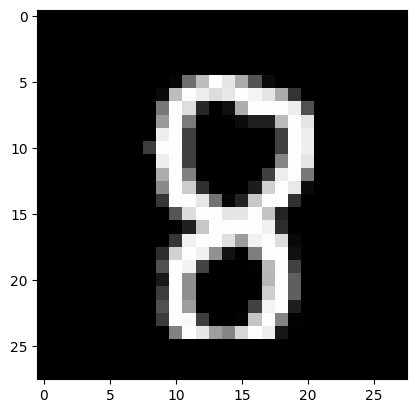

In [ ]:
n = 188
plt.imshow(Image.fromarray(x_train[n]).convert('RGBA'))
plt.show()

Изменение размерности данных MNIST для работы счёрточных сетей

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#Нейронные сети
Базовая архитектура свёрточной сети для работы с набором MNIST

Epoch 1/20
375/375 [==============================] - 7s 14ms/step - loss: 0.2485 - accuracy: 0.9233 - val_loss: 0.0580 - val_accuracy: 0.9830
Epoch 2/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0673 - accuracy: 0.9794 - val_loss: 0.0382 - val_accuracy: 0.9886
Epoch 3/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0519 - accuracy: 0.9846 - val_loss: 0.0314 - val_accuracy: 0.9908
Epoch 4/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0419 - accuracy: 0.9873 - val_loss: 0.0377 - val_accuracy: 0.9895
Epoch 5/20
375/375 [==============================] - 5s 12ms/step - loss: 0.0364 - accuracy: 0.9889 - val_loss: 0.0261 - val_accuracy: 0.9929
Epoch 6/20
375/375 [==============================] - 5s 13ms/step - loss: 0.0332 - accuracy: 0.9899 - val_loss: 0.0351 - val_accuracy: 0.9908
Epoch 7/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0357 - val_accuracy: 0.9908

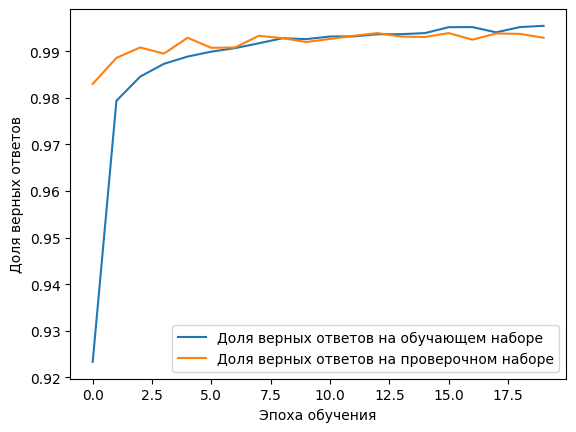

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(28, 28, 1)))
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Слой пакетной нормализации
model.add(BatchNormalization())
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Распознавание случайной цифры из тестового набора

In [ ]:
n = 150
prediction = model.predict(x_train)
print("Выход сети: ", prediction[n])
print("Распознанная цифра: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test[n])

1875/1875 [==============================] - 5s 3ms/step
Выход сети:  [4.9380263e-15 1.3522533e-09 5.0601166e-11 1.7707962e-17 1.0000000e+00
 5.8231719e-14 3.2385206e-13 8.7709076e-11 3.9411847e-14 4.7191552e-08]
Распознанная цифра:  4
Верный ответ:  9


Вариант нейронной сети для работы с набором CIFAR10
Отличия от базовой архитектуры:
- ядро свёртки первого слоя - 7, 7
- MaxPooling слои 4, 4 вместо базовых 2, 2

Epoch 1/20
313/313 [==============================] - 8s 15ms/step - loss: 1.6153 - accuracy: 0.4068 - val_loss: 1.3282 - val_accuracy: 0.5382
Epoch 2/20
313/313 [==============================] - 4s 12ms/step - loss: 1.2565 - accuracy: 0.5481 - val_loss: 1.0876 - val_accuracy: 0.6158
Epoch 3/20
313/313 [==============================] - 4s 14ms/step - loss: 1.0938 - accuracy: 0.6112 - val_loss: 0.9809 - val_accuracy: 0.6553
Epoch 4/20
313/313 [==============================] - 4s 13ms/step - loss: 0.9837 - accuracy: 0.6498 - val_loss: 0.8581 - val_accuracy: 0.6962
Epoch 5/20
313/313 [==============================] - 4s 13ms/step - loss: 0.9060 - accuracy: 0.6807 - val_loss: 0.8383 - val_accuracy: 0.7038
Epoch 6/20
313/313 [==============================] - 4s 13ms/step - loss: 0.8511 - accuracy: 0.6984 - val_loss: 0.8031 - val_accuracy: 0.7141
Epoch 7/20
313/313 [==============================] - 5s 17ms/step - loss: 0.8147 - accuracy: 0.7125 - val_loss: 0.8058 - val_accuracy: 0.7205

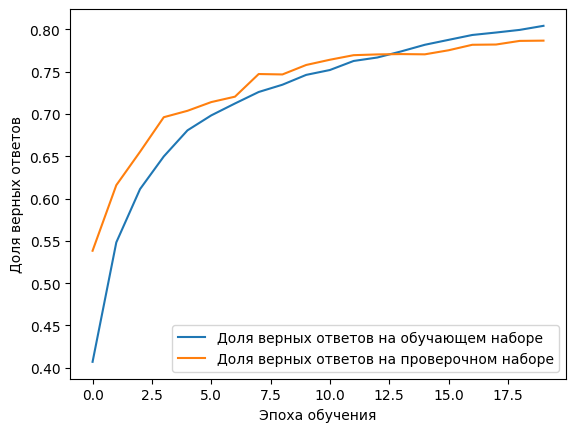

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
# Первый сверточный слой
model.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(4, 4)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Слой пакетной нормализации
model.add(BatchNormalization())
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10,
                    y_train10,
                    batch_size=batch_size,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Распознавание случайной картинки из тестового набора

313/313 [==============================] - 1s 3ms/step


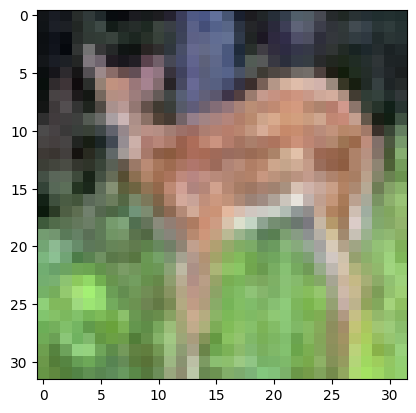

Выход сети:  [8.3155093e-08 2.6034273e-09 1.8466517e-02 1.0908112e-02 8.8442838e-01
 6.1655402e-02 7.8009190e-03 1.6740466e-02 5.5041860e-09 1.2929171e-08]
Распознанный образ:  4
Верный ответ:  [4]
Распознанный браз на картинке:  олень


In [ ]:
n = 1523
prediction = model.predict(x_test10)

plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
plt.show()
print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test10[n])
print("Распознанный браз на картинке: ", classes[np.argmax(prediction[n])])

## Распознаем дополнительные картинки

In [ ]:
files.upload()

{}

Проверяем загрузку файлов

In [ ]:
!ls

**Смотрим загруженную картинку**

In [ ]:
img_path = 'deer.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

**Преобразуем картинку в массив для распознавания**

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [ ]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Распознанный образ: ", prediction)
print("Название распознанного образа: ", classes[prediction])

#Разные архитектуры
Отключение MaxPooling слоёв

Epoch 1/20
313/313 [==============================] - 16s 46ms/step - loss: 2.1562 - accuracy: 0.2655 - val_loss: 1.6233 - val_accuracy: 0.4197
Epoch 2/20
313/313 [==============================] - 13s 43ms/step - loss: 1.5732 - accuracy: 0.4305 - val_loss: 1.3823 - val_accuracy: 0.4973
Epoch 3/20
313/313 [==============================] - 14s 45ms/step - loss: 1.3937 - accuracy: 0.4938 - val_loss: 1.3514 - val_accuracy: 0.5162
Epoch 4/20
313/313 [==============================] - 14s 45ms/step - loss: 1.2700 - accuracy: 0.5450 - val_loss: 1.2054 - val_accuracy: 0.5652
Epoch 5/20
313/313 [==============================] - 14s 44ms/step - loss: 1.1531 - accuracy: 0.5857 - val_loss: 1.1439 - val_accuracy: 0.5940
Epoch 6/20
313/313 [==============================] - 13s 43ms/step - loss: 1.0418 - accuracy: 0.6292 - val_loss: 1.0966 - val_accuracy: 0.6105
Epoch 7/20
313/313 [==============================] - 14s 43ms/step - loss: 0.9208 - accuracy: 0.6711 - val_loss: 1.0675 - val_accuracy:

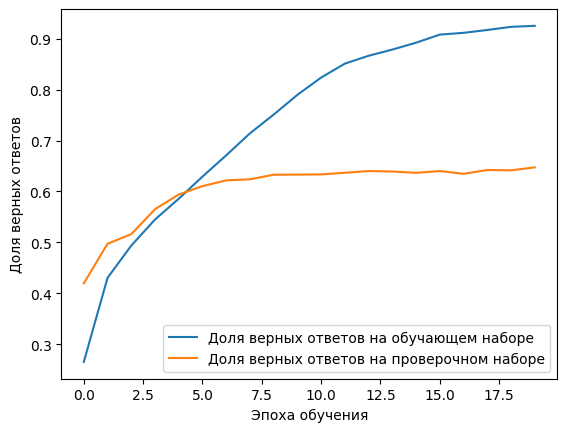

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
# Первый сверточный слой
model.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Слой пакетной нормализации
model.add(BatchNormalization())
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10,
                    y_train10,
                    batch_size=batch_size,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Отключение BatchNormalization слоёв

Epoch 1/20
313/313 [==============================] - 6s 15ms/step - loss: 2.3120 - accuracy: 0.2554 - val_loss: 1.7622 - val_accuracy: 0.3611
Epoch 2/20
313/313 [==============================] - 4s 13ms/step - loss: 1.6608 - accuracy: 0.3941 - val_loss: 1.4781 - val_accuracy: 0.4611
Epoch 3/20
313/313 [==============================] - 7s 22ms/step - loss: 1.5035 - accuracy: 0.4570 - val_loss: 1.3251 - val_accuracy: 0.5321
Epoch 4/20
313/313 [==============================] - 6s 19ms/step - loss: 1.3917 - accuracy: 0.5003 - val_loss: 1.2644 - val_accuracy: 0.5539
Epoch 5/20
313/313 [==============================] - 3s 11ms/step - loss: 1.2990 - accuracy: 0.5374 - val_loss: 1.1389 - val_accuracy: 0.5971
Epoch 6/20
313/313 [==============================] - 4s 14ms/step - loss: 1.2429 - accuracy: 0.5589 - val_loss: 1.1970 - val_accuracy: 0.5788
Epoch 7/20
313/313 [==============================] - 3s 11ms/step - loss: 1.1753 - accuracy: 0.5829 - val_loss: 1.0258 - val_accuracy: 0.6406

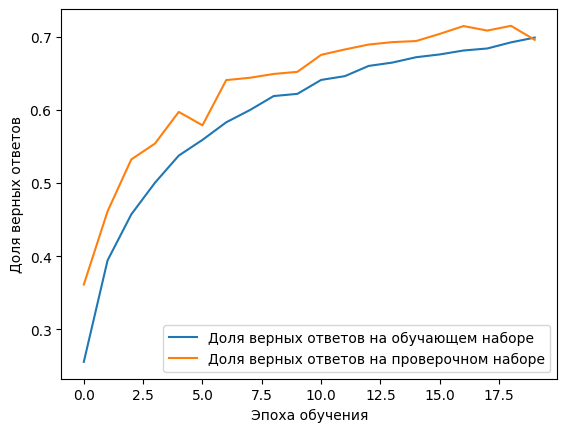

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (7, 7), input_shape=(32, 32, 3), padding='same', activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(4, 4)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10,
                    y_train10,
                    batch_size=batch_size,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Укороченная сеть, только один блок из двух 32 свёрточных слоёв, отключен второй блок из двух 64 свёрточных слоёв

Epoch 1/20
313/313 [==============================] - 6s 12ms/step - loss: 1.8213 - accuracy: 0.3355 - val_loss: 1.4434 - val_accuracy: 0.4914
Epoch 2/20
313/313 [==============================] - 4s 12ms/step - loss: 1.5168 - accuracy: 0.4522 - val_loss: 1.2556 - val_accuracy: 0.5625
Epoch 3/20
313/313 [==============================] - 4s 13ms/step - loss: 1.3882 - accuracy: 0.4976 - val_loss: 1.1495 - val_accuracy: 0.6008
Epoch 4/20
313/313 [==============================] - 4s 11ms/step - loss: 1.3086 - accuracy: 0.5306 - val_loss: 1.1042 - val_accuracy: 0.6176
Epoch 5/20
313/313 [==============================] - 4s 11ms/step - loss: 1.2637 - accuracy: 0.5495 - val_loss: 1.0437 - val_accuracy: 0.6335
Epoch 6/20
313/313 [==============================] - 4s 11ms/step - loss: 1.2249 - accuracy: 0.5648 - val_loss: 1.0443 - val_accuracy: 0.6375
Epoch 7/20
313/313 [==============================] - 4s 13ms/step - loss: 1.1843 - accuracy: 0.5751 - val_loss: 1.0069 - val_accuracy: 0.6550

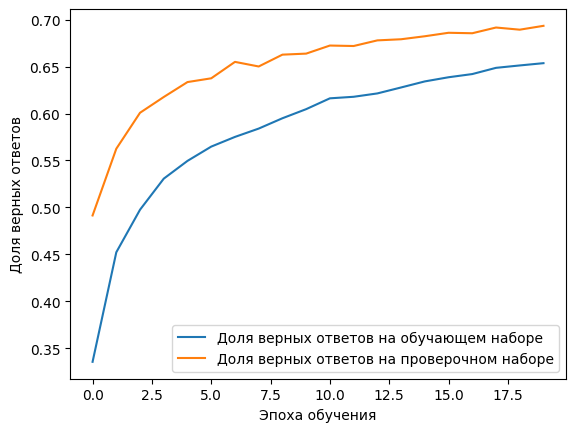

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
# Первый сверточный слой
model.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(4, 4)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(64, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10,
                    y_train10,
                    batch_size=batch_size,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()